In [7]:
import numpy as np
from micrograd.core import Tensor
from micrograd.utils.graph import draw_graph
from micrograd.nn import MSELoss, ReLU

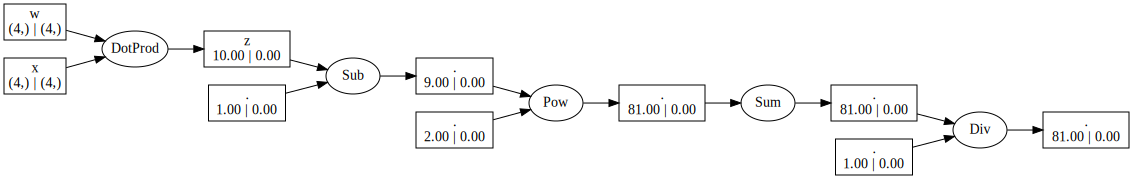

In [8]:
y = 1
x = Tensor(np.array([1,2,3,4]), name="x")
w = Tensor(np.array([1,1,1,1]), name="w")
z = w @ x; z.name = "z"
a = z
L = MSELoss()(a, y)
draw_graph(L)

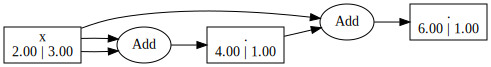

In [9]:
x = Tensor(2, name="x")
y1 = x.log(); y1.name = "y1"
y2 = x.log(); y2.name = "y2"
z = x + x + x

z.backward()
draw_graph(z)

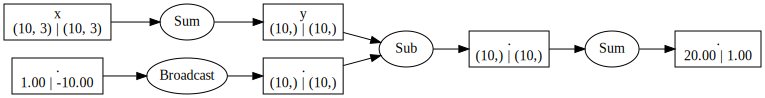

In [11]:
x = Tensor(np.ones((10, 3)), name="x")
y = x.sum(axis=1); y.name = "y"
w = (y - 1.0).sum(axis=None)
w.backward()
draw_graph(w)